In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('./spam_sms', header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns = ['sender', 'message']
df.head()

,sender,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.sender.value_counts()

ham     4825
spam     747
Name: sender, dtype: int64

In [5]:
df.head()

,sender,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
keywords = ['offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'money', 'reply', 'text']

for i in keywords:
    df[i] = df.message.str.contains(f"{i}", case=False)

In [7]:
df.head(15)

,sender,message,offer,winner,buy,free,cash,urgent,money,reply,text
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,True,False,False,False,False,True
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,True,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,True,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,True,False,False,False,False,False


In [8]:
df['all_caps'] = df.message.str.isupper()

In [9]:
df.query('all_caps == True and sender == "ham"')

,sender,message,offer,winner,buy,free,cash,urgent,money,reply,text,all_caps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,False,False,True
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,False,False,False,False,False,False,False,False,False,True
263,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,False,False,False,False,False,False,False,False,False,True
445,ham,HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYARO...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,False,False,False,False,False,False,False,False,False,True
5224,ham,OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE D...,False,False,False,False,False,False,False,False,False,True
5266,ham,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...,False,False,False,False,False,False,False,False,False,True
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,False,False,False,False,False,False,False,False,False,True


In [10]:
"AQWERTYU".isupper()

True

In [11]:
"qweGtyu".islower()

False

In [12]:
df.head()

,sender,message,offer,winner,buy,free,cash,urgent,money,reply,text,all_caps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,True,False,False,False,False,True,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False


In [13]:
df.corr()

,offer,winner,buy,free,cash,urgent,money,reply,text,all_caps
offer,1.000000,-0.005874,0.025002,0.082123,0.005490,0.007719,0.010692,0.123690,0.132788,-0.011952
winner,-0.005874,1.000000,-0.007314,-0.014386,0.109115,0.043414,0.021576,0.007351,0.015324,0.013302
buy,0.025002,-0.007314,1.000000,-0.017869,-0.013798,0.030685,0.036679,0.012089,-0.015105,-0.014882
free,0.082123,-0.014386,-0.017869,1.000000,0.071493,-0.002147,-0.014062,0.215352,0.211837,-0.029272
cash,0.005490,0.109115,-0.013798,0.071493,1.000000,0.176222,-0.012238,-0.000611,-0.001956,-0.015910
urgent,0.007719,0.043414,0.030685,-0.002147,0.176222,1.000000,-0.011283,-0.018108,-0.022917,-0.002067
money,0.010692,0.021576,0.036679,-0.014062,-0.012238,-0.011283,1.000000,-0.004877,-0.002301,-0.013199
reply,0.123690,0.007351,0.012089,0.215352,-0.000611,-0.018108,-0.004877,1.000000,0.135034,-0.021183
text,0.132788,0.015324,-0.015105,0.211837,-0.001956,-0.022917,-0.002301,0.135034,1.000000,-0.012620
all_caps,-0.011952,0.013302,-0.014882,-0.029272,-0.015910,-0.002067,-0.013199,-0.021183,-0.012620,1.000000


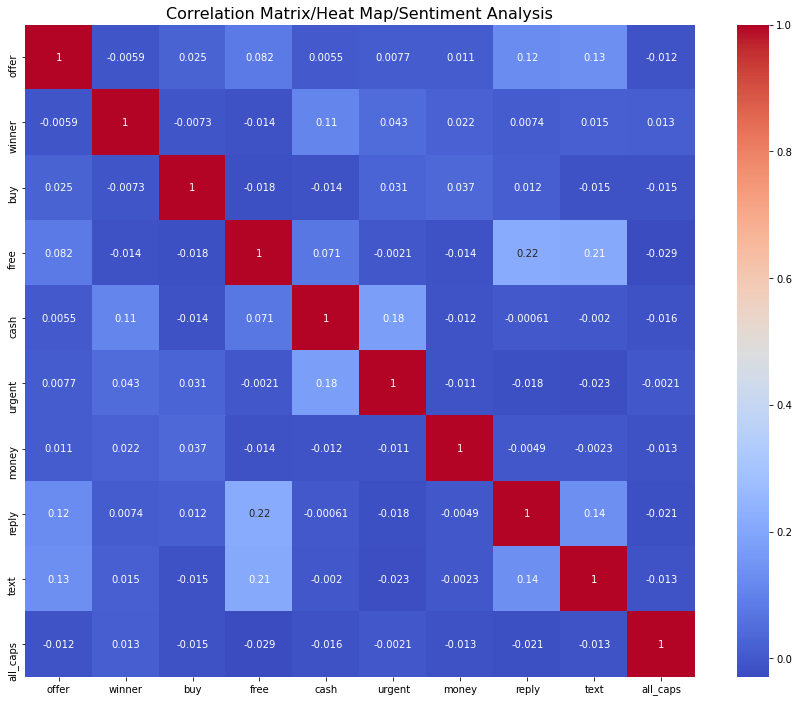

In [14]:
plt.figure(figsize=(15, 12))

plt.title("Correlation Matrix/Heat Map/Sentiment Analysis", fontsize=16)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [15]:
data = df[keywords + ['all_caps']]

target = df['sender']

In [16]:
target

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: sender, Length: 5572, dtype: object

In [17]:
data.head()

,offer,winner,buy,free,cash,urgent,money,reply,text,all_caps
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [18]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [19]:
print(f"Out of {data.shape[0]} records, there are {(target != y_pred).sum()} of incorrectly labeled spam messages")

Out of 5572 records, there are 493 of incorrectly labeled spam messages


In [31]:
import nltk
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [22]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
df = pd.read_table('./spam_sms', header=None)
# df.head()

df.columns = ['sender', 'message']
df.head()

,sender,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
punctuation_set = set(string.punctuation)

In [35]:
punctuation_set

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [36]:
df.head()

,sender,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df['cleaned_messages'] = df.message.apply(lambda x: " ".join([i for i in x.split() if i not in stop_words and i not in punctuation_set]))
df.head()

,sender,message,cleaned_messages
0,ham,"Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I think goes usf, lives around though"


In [39]:
sentence = "Free entry in 2 a wkly comp to win FA Cup"

In [45]:
df.cleaned_messages = df.cleaned_messages.str.lower()
df.head()

,sender,message,cleaned_messages
0,ham,"Go until jurong point, crazy.. Available only ...","go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i think goes usf, lives around though"


In [46]:
word_vector = CountVectorizer()
word_vector

CountVectorizer()

In [47]:
X = word_vector.fit_transform(df.cleaned_messages)
y = df.sender

In [51]:
X.shape

(5572, 8703)

In [52]:
y.shape

(5572,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
X_test

<1393x8703 sparse matrix of type '<class 'numpy.int64'>'
	with 13527 stored elements in Compressed Sparse Row format>

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9784637473079684

<img src="https://tatwan.github.io/images/mock.png" />

In [60]:
confusion_matrix(y_test, y_pred)

array([[1205,    5],
       [  25,  158]])